In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_assignment.csv')
df['SalaryRange']= [str(x) + ' - ' + str(y) for x, y in zip(df['LowestSalary'], df['HighestSalary'])]
df['Date'] = df['Date'].str.split('T').str[0]
df['Date'] = pd.to_datetime(df['Date'])
#1. ANALYSE BY COMPARISON
#Choose your two favourite cities/locations.
#Which city has more jobs?How many jobs of each type (casual, fulltime, etc.) in each city?
bris_jobs = df[df['Location'] == 'Brisbane']
goldie_jobs = df[df['Location'] == 'Gold Coast']
bris_jobs.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0 - 30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0 - 30
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,0 - 30
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,0 - 30
40,37404400,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,0 - 30


In [3]:
len(bris_jobs)

16538

In [4]:
len(goldie_jobs)

2758

In [5]:
bris_jobs['JobType'].value_counts()

Full Time          10431
Contract/Temp       3164
Casual/Vacation     1543
Part Time            988
Name: JobType, dtype: int64

In [6]:
goldie_jobs['JobType'].value_counts()

Full Time          1617
Casual/Vacation     539
Contract/Temp       299
Part Time           244
Name: JobType, dtype: int64

In [7]:
#In each city, which are the top 5 job sectors? 
#How many jobs are there in each sector?
bris_class = bris_jobs['Classification'].value_counts()[:5]
bris_class

Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
Name: Classification, dtype: int64

In [8]:
goldie_class = goldie_jobs['Classification'].value_counts()[:5]
goldie_class

Hospitality & Tourism                   467
Trades & Services                       363
Healthcare & Medical                    339
Retail & Consumer Products              180
Manufacturing, Transport & Logistics    176
Name: Classification, dtype: int64

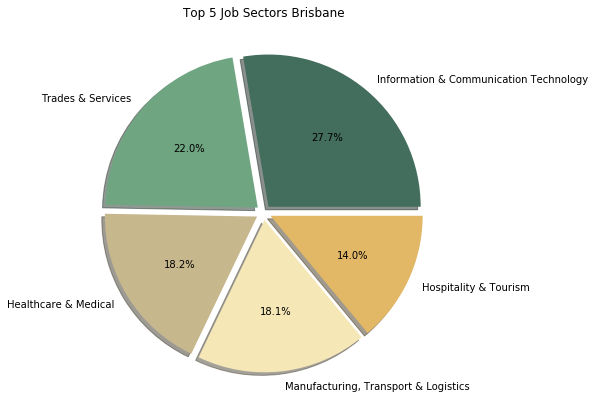

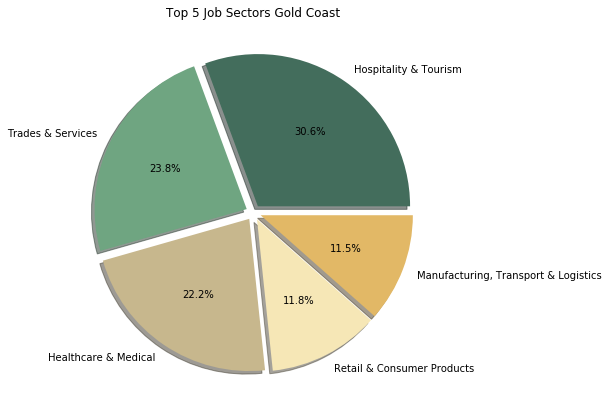

In [9]:
#Visualise the top 5 job sectors in pie chart for each city.
my_explode = (0.05, 0.05, 0.05, 0.05 ,0.05)
my_colours = ['#436d5c', '#6fa581', '#c7b78d', '#f6e7b6', '#e2b866']
#Brisbane
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(bris_class, labels=bris_class.index, autopct='%1.1f%%', shadow=True, colors=my_colours, explode=my_explode)
ax.set_title('Top 5 Job Sectors Brisbane')
plt.show()
#Gold Coast
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(goldie_class, labels=goldie_class.index, autopct='%1.1f%%', shadow=True, colors=my_colours, explode=my_explode)
ax.set_title('Top 5 Job Sectors Gold Coast')
plt.show()

In [10]:
#In each city, list the job salary range with the corresponding number of jobs. 
#Which city is more well-paid?
#Brisbane Salary Range Counts
bris_jobs['SalaryRange'].value_counts()

0 - 30       2962
40 - 50      2271
60 - 70      1611
100 - 120    1494
50 - 60      1481
70 - 80      1384
80 - 100     1317
150 - 200    1202
30 - 40      1192
120 - 150    1076
200 - 250     548
Name: SalaryRange, dtype: int64

In [11]:
#Finding Percentage of Salary Ranges for better comparison with GC
(bris_jobs['SalaryRange'].value_counts()/len(bris_jobs))*100

0 - 30       17.910267
40 - 50      13.732011
60 - 70       9.741202
100 - 120     9.033740
50 - 60       8.955134
70 - 80       8.368606
80 - 100      7.963478
150 - 200     7.268110
30 - 40       7.207643
120 - 150     6.506228
200 - 250     3.313581
Name: SalaryRange, dtype: float64

In [12]:
#Gold Coast Salary Range counts
goldie_jobs['SalaryRange'].value_counts()

40 - 50      630
0 - 30       521
30 - 40      375
50 - 60      298
60 - 70      285
70 - 80      196
80 - 100     138
100 - 120    123
150 - 200     81
120 - 150     69
200 - 250     42
Name: SalaryRange, dtype: int64

In [13]:
#Finding Percentage of Salary Ranges for better comparison with Bris
(goldie_jobs['SalaryRange'].value_counts()/len(goldie_jobs))*100

40 - 50      22.842640
0 - 30       18.890500
30 - 40      13.596809
50 - 60      10.804931
60 - 70      10.333575
70 - 80       7.106599
80 - 100      5.003626
100 - 120     4.459753
150 - 200     2.936911
120 - 150     2.501813
200 - 250     1.522843
Name: SalaryRange, dtype: float64

In [14]:

#LEAVING BLANK FOR READABILITY. BELOW IS INFORMATION FOR BRISBANE


In [15]:
#List top 5 companies in each city? Which sectors do they belong to?
bris_jobs['Company'].value_counts()[:5]

Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
The University of Queensland    180
Programmed Skilled Workforce    171
Name: Company, dtype: int64

In [16]:
#Finding Jora Local classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Jora Local']['Classification'].value_counts()

Hospitality & Tourism         235
Trades & Services               2
Retail & Consumer Products      1
Name: Classification, dtype: int64

In [17]:
#Finding u&u classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'u&u. Recruitment Partners']['Classification'].value_counts()

Information & Communication Technology    85
Accounting                                26
Legal                                     17
Human Resources & Recruitment             12
Marketing & Communications                11
Administration & Office Support            8
Construction                               6
Sales                                      5
Engineering                                5
Banking & Financial Services               3
Consulting & Strategy                      3
Government & Defence                       2
Manufacturing, Transport & Logistics       2
Design & Architecture                      2
Education & Training                       1
Community Services & Development           1
Call Centre & Customer Service             1
Mining, Resources & Energy                 1
Name: Classification, dtype: int64

In [18]:
#Finding Hudson classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Hudson']['Classification'].value_counts()

Information & Communication Technology    116
Administration & Office Support            21
Human Resources & Recruitment               9
Government & Defence                        7
Accounting                                  7
Engineering                                 5
Consulting & Strategy                       4
Call Centre & Customer Service              4
Marketing & Communications                  4
Education & Training                        3
Hospitality & Tourism                       2
Manufacturing, Transport & Logistics        1
Sales                                       1
Community Services & Development            1
CEO & General Management                    1
Design & Architecture                       1
Name: Classification, dtype: int64

In [19]:
#Finding UQ classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'The University of Queensland']['Classification'].value_counts()

Education & Training                      121
Science & Technology                       12
Healthcare & Medical                       10
Administration & Office Support             9
Engineering                                 8
Information & Communication Technology      6
Accounting                                  3
Marketing & Communications                  3
Human Resources & Recruitment               2
Mining, Resources & Energy                  1
Consulting & Strategy                       1
Advertising, Arts & Media                   1
Community Services & Development            1
Real Estate & Property                      1
Design & Architecture                       1
Name: Classification, dtype: int64

In [20]:
#Finding Programmed Skilled WF classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Programmed Skilled Workforce']['Classification'].value_counts()

Manufacturing, Transport & Logistics      86
Trades & Services                         74
Construction                               4
Administration & Office Support            4
Human Resources & Recruitment              1
Information & Communication Technology     1
Sport & Recreation                         1
Name: Classification, dtype: int64

In [21]:

#LEAVING BLANK FOR READABILITY. BELOW IS INFORMATION FOR GOLD COAST


In [22]:
goldie_jobs['Company'].value_counts()[:5]

Jora Local                              139
Gold Coast Hospital & Health Service     64
Hays Trades & Labour                     45
City of Gold Coast                       30
Griffith University                      28
Name: Company, dtype: int64

In [23]:
#Finding Jora Local classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Jora Local']['Classification'].value_counts()

Hospitality & Tourism         134
Retail & Consumer Products      3
Trades & Services               2
Name: Classification, dtype: int64

In [24]:
#Finding GC Hospital classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Gold Coast Hospital & Health Service']['Classification'].value_counts()

Government & Defence               31
Healthcare & Medical               24
Administration & Office Support     3
Legal                               2
Banking & Financial Services        2
Education & Training                1
Hospitality & Tourism               1
Name: Classification, dtype: int64

In [25]:
#Finding Hays classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Hays Trades & Labour']['Classification'].value_counts()

Trades & Services                       40
Manufacturing, Transport & Logistics     2
Sport & Recreation                       2
Construction                             1
Name: Classification, dtype: int64

In [26]:
#Finding City of GC classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'City of Gold Coast']['Classification'].value_counts()

Government & Defence                      15
Engineering                                7
Education & Training                       2
Information & Communication Technology     2
Consulting & Strategy                      1
Sport & Recreation                         1
CEO & General Management                   1
Design & Architecture                      1
Name: Classification, dtype: int64

In [27]:
#Finding GU classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Griffith University']['Classification'].value_counts()

Education & Training                      21
Administration & Office Support            4
Healthcare & Medical                       1
Information & Communication Technology     1
Banking & Financial Services               1
Name: Classification, dtype: int64

In [28]:

#LEAVING BLANK FOR READABILITY


In [29]:
#Between 2 cities, which do you think it is better for employees. Explain your choice.

In [61]:
#2. ANALYSE BY TIME
#Visualise the number of job posts by month.
df['Month'] = [x.strftime("%b") for x in df['Date']]
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Day'] = [x.strftime("%d") for x in df['Date']]


In [62]:
df['Month'].value_counts()

Oct    113782
Nov     36217
Name: Month, dtype: int64

In [31]:
#Visualise the number of job posts by day of week.

In [32]:
#Visualise the number of job posts by day of the month.

In [33]:
#Visualise trending of the job postings for the big cities.

In [34]:
#Based on the above charts, provide your observation about the number of job posts over time.
#Give your own conclusion.

In [35]:
#3. Forecasting and Skill Extractions
#Using moving average for 7 days and 30 days to predict the number of jobs postings and visualise them in a line chart.
#Which one creates a better prediction? Explain your choice.

In [36]:
#Choose your favourtie job sector/sub-sector, then use TF/IDF to extract important keywords.
#Visualise in word cloud chart.

In [37]:
#Discussion
#Scenario 1
#Need to find possible major at Uni which can guarantee a job in QLD with income >= 80k

In [38]:
#Scenario 2
#Find which majors should be increased/refuced based on chances to find job in field?